# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**

Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!

Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

In [81]:
import os
if not os.path.exists("Data"):
    print("Ordner Data erstellt")
    os.makedirs("Data") 
elif os.path.exists("Data"):
    print("Ordner Data ist bereits vorhanden")

# Erstellt dir ein Ordner wo du deine Daten speichern kannst

Ordner Data ist bereits vorhanden


### Füge hier alle benötigten Libaries ein:
---

In [82]:
import importlib
import subprocess
import sys

def install_and_import(package):
    try:
        # Überprüfen, ob das Paket bereits installiert ist
        importlib.import_module(package)
        print(f"'{package}' ist bereits installiert.")
    except ImportError:
        # Falls das Paket nicht installiert ist, wird es installiert
        print(f"'{package}' wird installiert.")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])


install_and_import('scipy')  # Ersetzt 'numpy' mit dem gewünschten Paketnamen

'scipy' ist bereits installiert.


## Manuelle Installation 
---

In [83]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import numpy as np

#### Lese hier deine Daten ein:
---

gebe dazu in den "`Path to your file"` wo deine Datei liegt, sowie den passenden Seprator

In [85]:
df = pd.read_csv("Data/wage.csv", sep=';')

#### Begutachte deine Daten:

In [86]:
# gebe dir die ersten 5 reihen des Datensatzes aus:
df.head()

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1


In [87]:
Reihen, Spalten = df.shape

# gebe die Anzahl der Reihen und Spalten aus:
print("Anzahl der Reihen: ", Reihen)
print("Anzahl der Spalten: ", Spalten)

Anzahl der Reihen:  998
Anzahl der Spalten:  4


Im folgenden Code wirst du eine Statitische Zusammenfassung des Datensatzes erhalten.
Nimm dir eigene Minuten Zeit dein Daten satz zu analysieren und die wichtigsten Informationen herauszufinden.

- Hinterfrage deine Daten und versuche Zusammenhänge zu finden.

In [88]:
df.describe().round(2)


# save output of the describtion as a text file
# with open('Regression_Output/out.txt', 'w') as f:
#     f.write(df.describe().round(2).to_string()) 

,wage,educ,exper,metro
count,998.00,998.00,998.00,998.00
mean,10.23,13.29,18.79,0.81
std,6.24,2.47,11.32,0.39
min,2.07,1.00,0.00,0.00
25%,5.53,12.00,10.00,1.00
50%,8.82,13.00,18.00,1.00
75%,12.84,16.00,26.00,1.00
max,60.19,18.00,52.00,1.00


Solltest du im folgenden mehrere NaN values haben, wähle eine der folgenden Optionen:
1. Lösche die Zeilen mit NaN values
2. Fülle die NaN values mit einem Wert deiner Wahl
3. Fülle die NaN values mit dem Durchschnittswert der Spalte (mean, mode, median)

In [89]:
df.isnull().sum()

wage     0
educ     0
exper    0
metro    0
dtype: int64

In [90]:
# Lösche die Zeilen mit NaN values 
#df = df.dropna()

# Fülle die NaN values mit einem Wert deiner Wahl
#df = df.fillna()

# Fülle die NaN values mit dem Durchschnittswert der Spalte
#df["wage"]= df["wage"].fillna(df["wage"].mean()) # nur eine Spalte werden die Daten ersetzt
#df = df.fillna(df.mean()) #<- mean(), mode(), median() / Alle Spalten werden ersetzt

## Filterung der Daten

weitere Informationen findest du im Leitfaden
Daten filterung:

1. Filterung nach einer Kondition:

`df_filtered = df[df["wage"] > 12.00]`

In [91]:
df_filtered = df[df["wage"] > 12]
df_filtered

,wage,educ,exper,metro
698,12.020000,18,8,1
699,12.030000,16,1,1
700,12.030000,12,17,1
701,12.030000,16,14,1
702,12.030000,16,9,1
...,...,...,...,...
993,35.419998,18,23,1
994,36.840000,16,7,1
995,41.320000,16,11,1
996,47.220001,18,35,1


2. Filterung mit mehreren Kondition 

`df_filtered_educ = df[(df["wage"] > 12.00) & (df["educ"] == 12)]`

In [133]:
df_filtered_educ = df[(df["wage"] > 12.00) & 
                      (df["educ"] == 12) & 
                      (df["metro"] == 0) &
                      (df["exper"] > 1) ] # Beachte das du nun deine gewünschte Spalten namen hinzufügen musst
df_filtered_educ

,wage,educ,exper,metro
723,12.400000,12,25,0
760,13.100000,12,24,0
810,14.730000,12,42,0
862,16.209999,12,29,0
866,16.370001,12,22,0
902,18.330000,12,40,0
975,26.980000,12,45,0


# Visualisierungen:

## Histogramm
---

Text(0.5, 1.0, 'Histogramm des Lohns')

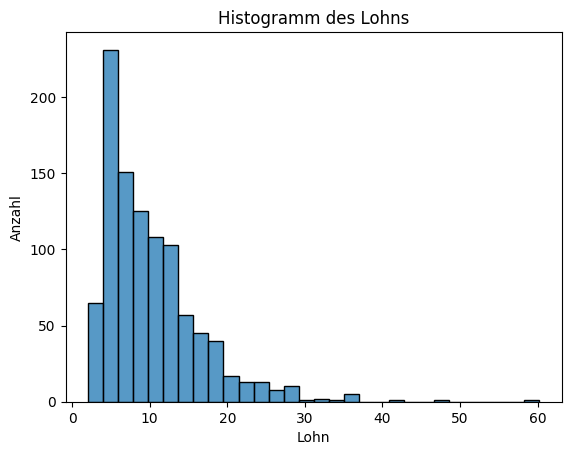

In [93]:
sns.histplot(data=df, x="wage", bins=30)
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")
# plt.savefig("Vis/Title_") # speicher die Visualisierung

### Korrelations Matrix
---
Folgenden Methoden sind möglich: `pearson, kendall, spearman`

<Axes: >

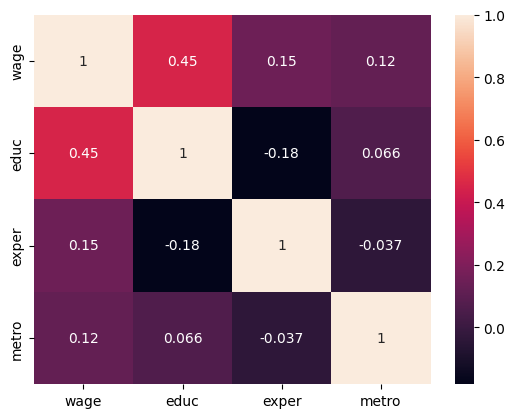

In [135]:
sns.heatmap(df.corr(method = "pearson", numeric_only=True), annot=True) 
# in "method" kann du folgenden Mehthoden aussuchen pearson, kendall, spearman
# plt.savefig("Vis/Title_")

## Scatterplot
---

Text(0.5, 1.0, 'Scatterplot von Erfahrung und Lohn')

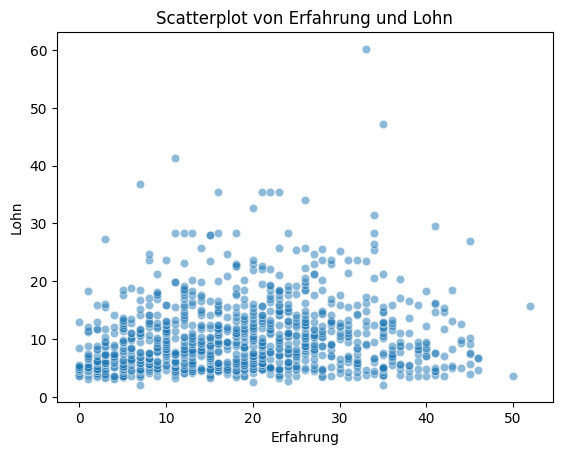

In [95]:
sns.scatterplot(data=df, x="exper", y="wage", alpha=0.5) # alpha fügt transparenz hinzu
plt.xlabel("Erfahrung")
plt.ylabel("Lohn")
plt.title("Scatterplot von Erfahrung und Lohn")
# plt.savefig("Vis/Title_") 

## Balkendiagramm
---

Text(0.5, 1.0, 'Metro und Lohn')

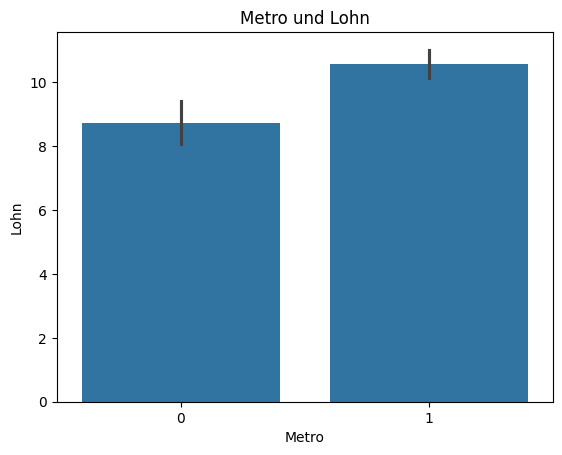

In [96]:
sns.barplot(data=df, x="metro", y="wage")
plt.xlabel("Metro")
plt.ylabel("Lohn")
plt.title("Metro und Lohn")
# plt.savefig("Vis/Title_")

## Regressions Analyse

In [97]:
import statsmodels.api as sm
import sklearn as sk
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

## Lege deine Abhängige und Unabhänige Varaible fest

In [98]:
X = df[["educ", "exper", "metro"]]
y = df["wage"]

### Erstelle deine Regression:
1. Möglichkeit:

In [99]:
X = sm.add_constant(X)
model_stats = sm.OLS(y, X)
model = model_stats.fit()

print(model.summary())


with open('Regression_Output/summary.txt', 'w') as fh:
    fh.write(model.summary().as_text()) # Speicher dein Regressions Ergebnis in einer Text Datei in dem Odner Regression Output

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     120.2
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           2.06e-66
Time:                        11:42:16   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8581      1.077     -9.154      0.0

In [100]:
parameter = model.params
parameter

const   -9.858057
educ     1.232183
exper    0.132734
metro    1.509102
dtype: float64

Formel: y_hat = intercept + b1 * educ + b1 * exper + b1 * educ + b1 * metro

In [101]:
educ = 0
exper = 0
metro = 0

y_hat = parameter[0] + parameter[1] * educ + parameter[2] * exper + parameter[3] + metro

y_hat

/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_37491/665475828.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = parameter[0] + parameter[1] * educ + parameter[2] * exper + parameter[3] + metro


np.float64(-8.348954639686218)

### 2. Möglicheit die mehr an R erinnert:

In [102]:
from statsmodels.formula.api import ols 
linear_model = ols('wage ~ educ + exper + metro', 
                   data=df).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     120.2
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           2.06e-66
Time:                        11:42:16   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.8581      1.077     -9.154      0.000     -11.971      -7.745
educ           1.2322      0.070     17.609      0.000       1.095       1.369
exper          0.1327      0.015      8.703      0.000       0.103       0.163
metro          1.5091      0.432      3.493      0.000       0.661       2.357
==============================================================================
Omnibus:                      412.972   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2861.174
Skew:                           1.744   Prob(JB):                         0.00
Kurtosis:                      10.526   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Vorhersagen treffen:

In [103]:
prediction = linear_model.predict(X)
prediction[:5] # Die ersten 5 Vohersagen, um alle zu sehen entferne die [:5]

0     7.366383
1    11.082949
2    14.020664
3     9.622870
4     8.200363
dtype: float64

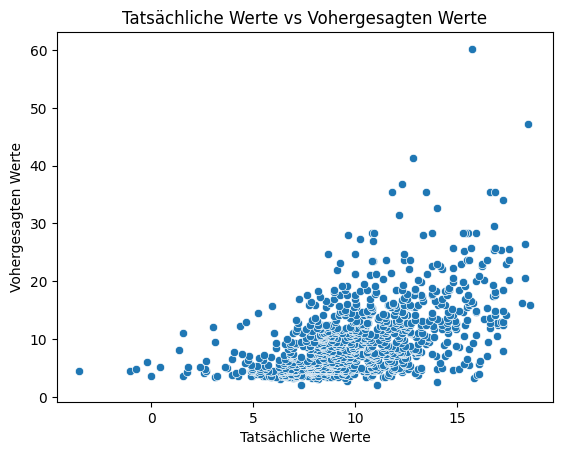

In [104]:
sns.scatterplot(x=prediction, y=df["wage"])
plt.title("Tatsächliche Werte vs Vohergesagten Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vohergesagten Werte")
plt.savefig("Vis/Title_")

## Residuale 
---

### Residuale berechen

1. Möglichkeit durch eine eingbaute Funktion:

In [105]:
residuals = linear_model.resid
residuals

0      -5.296383
1      -8.962949
2     -11.480664
3      -6.942870
4      -5.110363
         ...    
993    18.536765
994    24.544885
995    28.493947
996    28.743954
997    44.443787
Length: 998, dtype: float64

2. Möglichkeit eigene berechnung:

In [106]:
residuals_model = df["wage"] - prediction # tatsächliche Werte - Vorhersagen
residuals_model

0      -5.296383
1      -8.962949
2     -11.480664
3      -6.942870
4      -5.110363
         ...    
993    18.536765
994    24.544885
995    28.493947
996    28.743954
997    44.443787
Length: 998, dtype: float64

In [107]:
SSResiduals = (residuals**2).sum()

SSTotal = ((df["wage"] - df["wage"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

np.float64(0.2661773034647066)

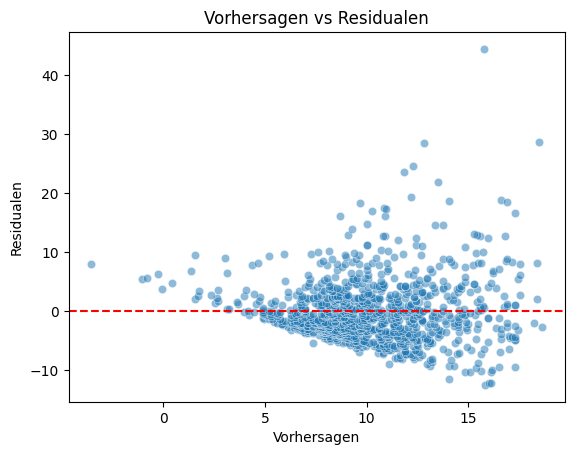

In [108]:
# Vorhersagen (Predictions)
predictions = linear_model.fittedvalues

# Scatterplot der Vorhersagen gegen Residualen
sns.scatterplot(x=predictions, y=residuals, alpha = 0.5)
plt.title("Vorhersagen vs Residualen")
plt.axhline(y = 0, color = 'r', linestyle = '--') # fügt eine rote horziontale Linie hinzu
plt.xlabel("Vorhersagen")
plt.ylabel("Residualen")
plt.savefig("Vis/Title_Residuals_vs_Predictions.png")
plt.show()


In [109]:
print(linear_model.fittedvalues.mean())
print(linear_model.predict().mean())

10.228276573146296
10.228276573146296


<Axes: >

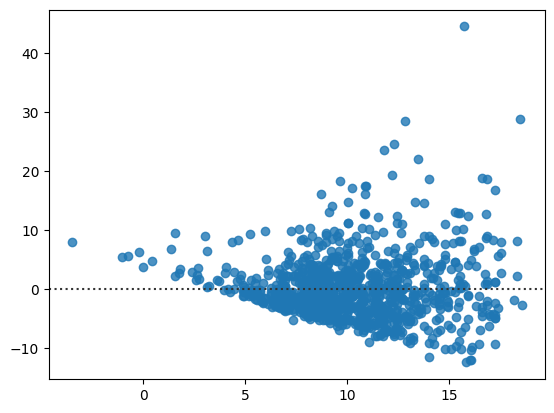

In [110]:
sns.residplot(x=prediction, y=residuals)

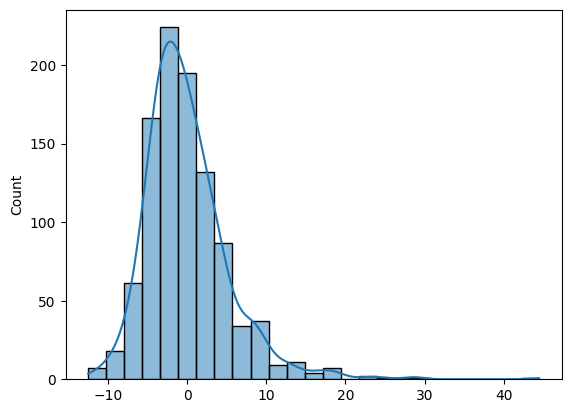

In [141]:
model_residuals = model.resid
sns.histplot(model_residuals, kde=True, bins=25)
plt.savefig("Vis/Title_")

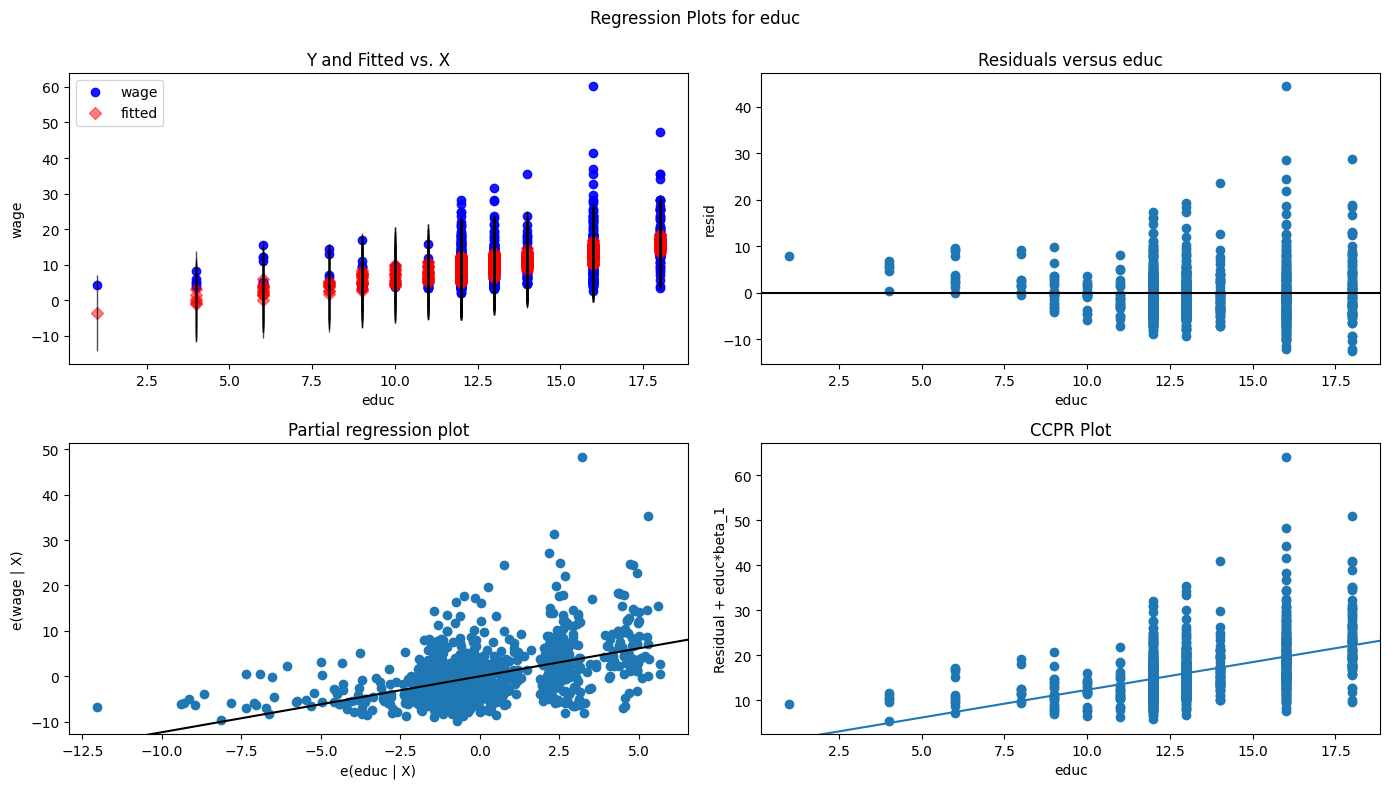

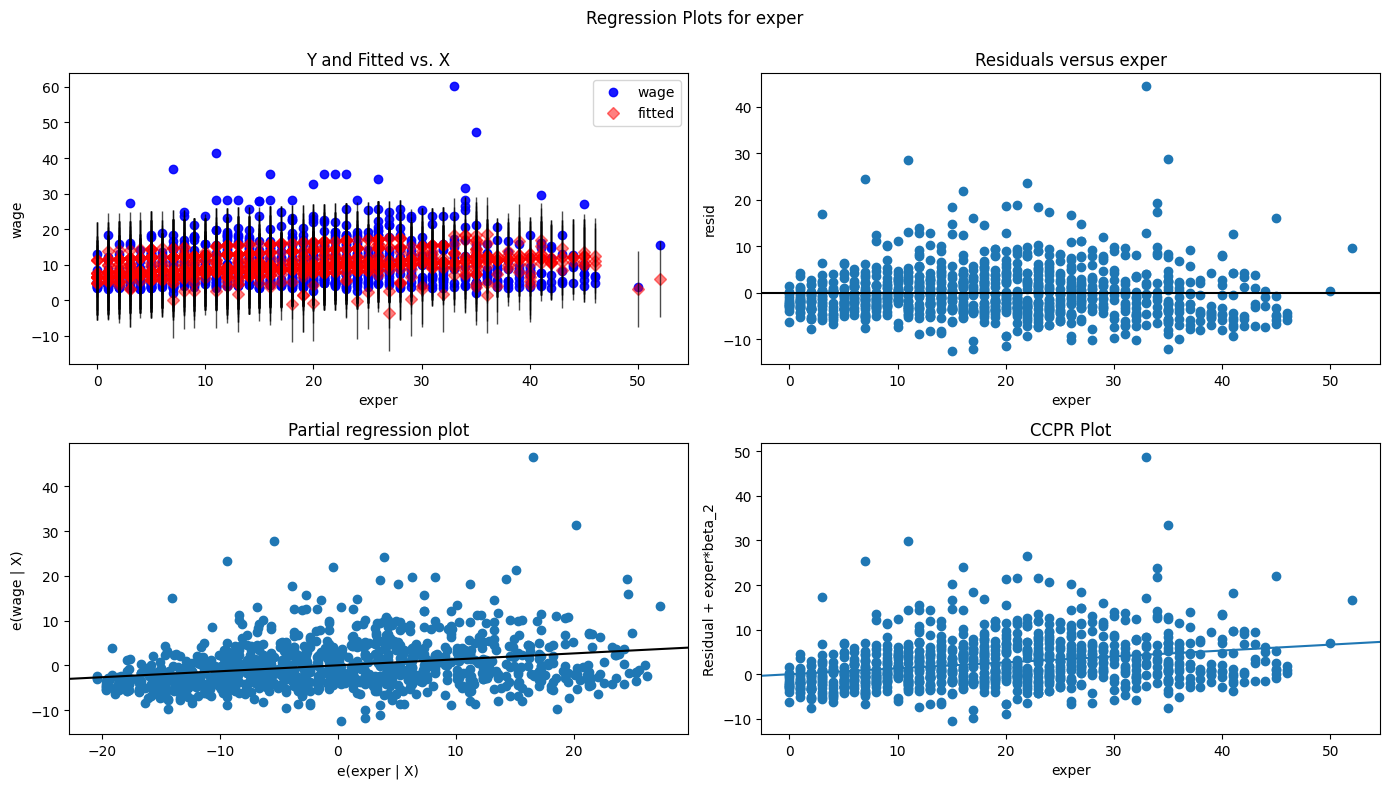

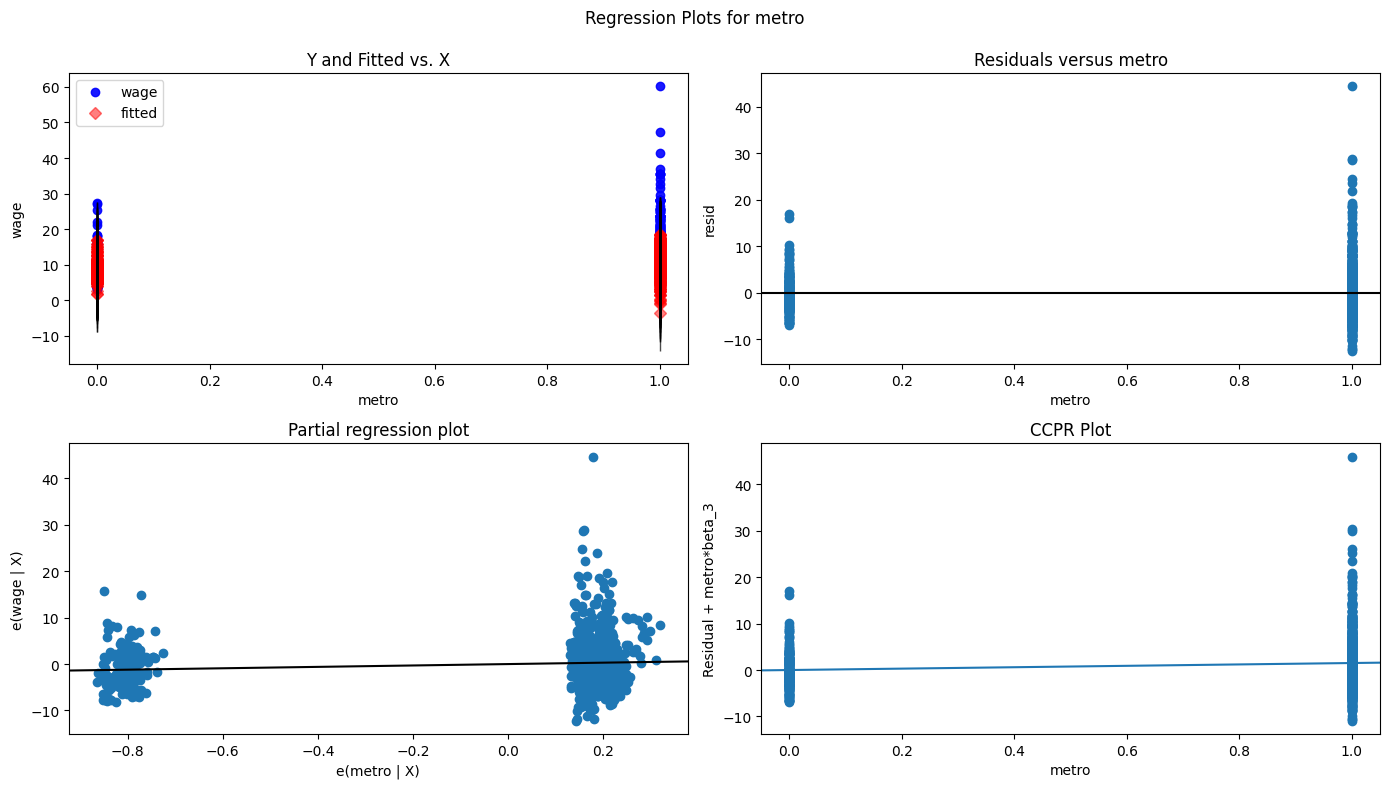

In [112]:
for col in df.columns:
    if col != "wage":        
        fig = plt.figure(figsize=(14, 8)) 

        fig = sm.graphics.plot_regress_exog(linear_model, 
                                        col, 
                                        fig=fig) 

## Vorhersagen treffen
---

## Simple Lineare Regression aufbauen
---

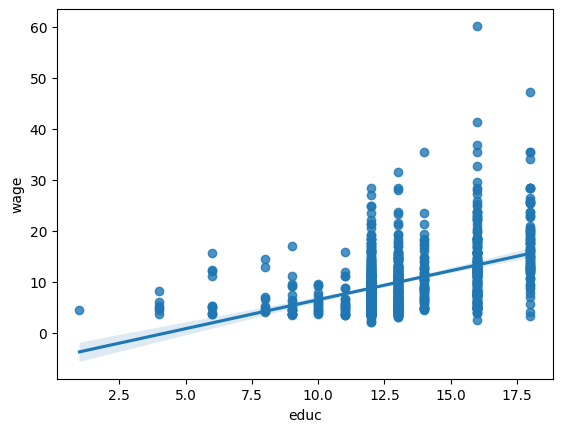

In [113]:
sns.regplot(data = df, x="educ", y ="wage")
plt.savefig("Vis/Title_")

<Axes: xlabel='exper', ylabel='wage'>

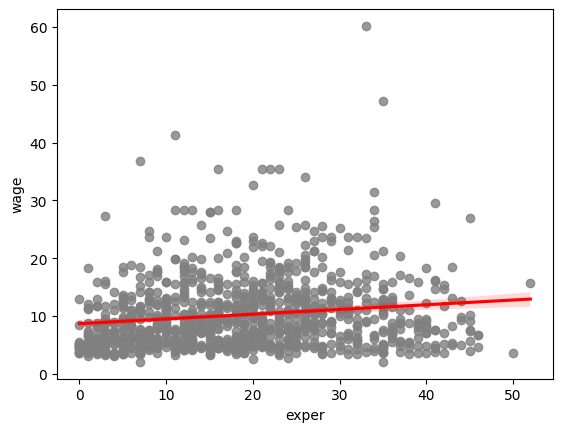

In [114]:
sns.regplot(data = df, x="exper", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})
# plt.savefig("Vis/Title_")

<Axes: xlabel='metro', ylabel='wage'>

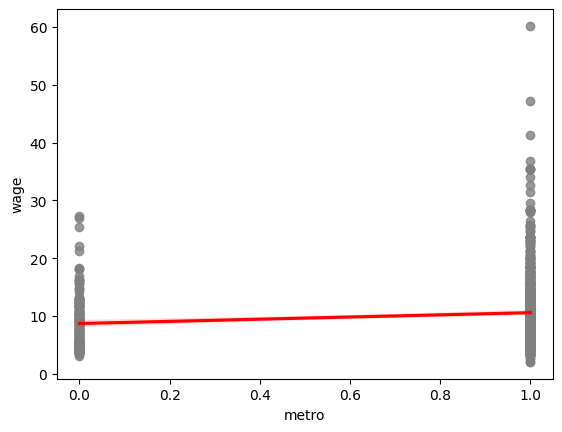

In [115]:
sns.regplot(data = df, x="metro", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})

# plt.savefig("Vis/Title_")

### Analysis of variance (Anova)

In [116]:
from scipy.stats import f_oneway

In [117]:
df.columns

wage = df['wage']
educ = df['educ']
exper = df['exper']
metro = df['metro']

In [118]:
f_oneway(wage,educ,exper,metro)

F_onewayResult(statistic=np.float64(1306.9793462926605), pvalue=np.float64(0.0))

## Heteroskedasticity testen

In [119]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols


In [124]:
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(
    linear_model.resid, linear_model.model.exog)


print(f"LM Statistic: {bp_lm}")
print(f"LM p-value: {bp_lm_pvalue}")
print(f"F Statistic: {bp_fvalue}")
print(f"F p-value: {bp_f_pvalue}")

LM Statistic: 42.76916568859225
LM p-value: 2.7549846935235586e-09
F Statistic: 14.835000842180893
F p-value: 1.872207806675279e-09


In [132]:
ols = sm.OLS(y, X).fit(cov_type="HC1")
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     80.93
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           7.59e-47
Time:                        11:53:22   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8581      1.213     -8.129      0.0